In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


### 读取数据

In [2]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [3]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [4]:
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


### 异常值分析

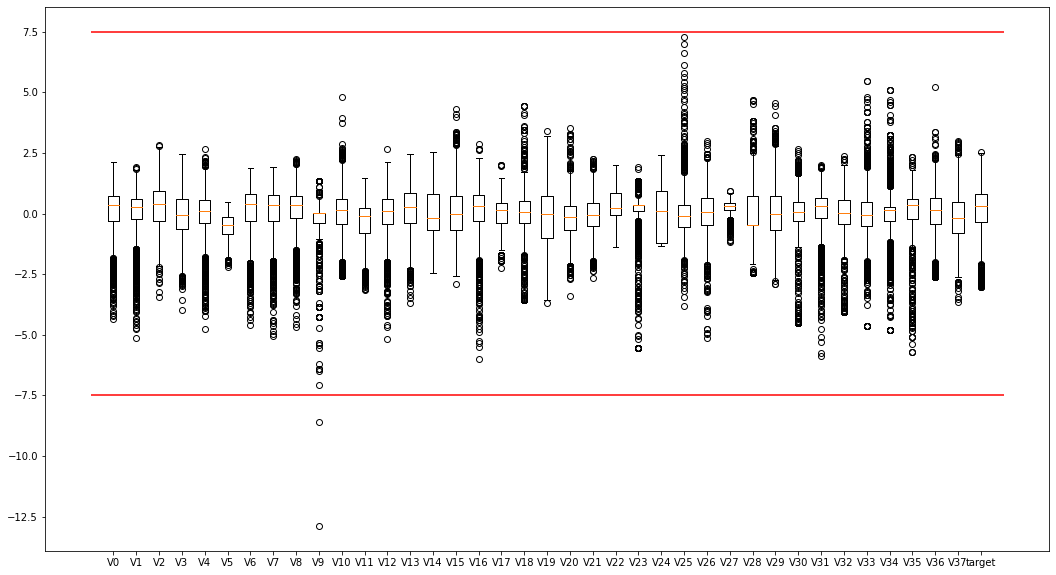

In [5]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

#### 删除异常值

In [6]:
train_data = train_data[train_data['V9']>-7.5]
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


## 归一化

In [7]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])


train_data_scaler = pd.DataFrame(train_data_scaler)

train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

## 相关性分析

In [8]:
train_data=train_data_scaler.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
train_data


,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.427136,0.385874,0.613522,0.221743,0.698875,...,0.406834,0.641467,0.666159,0.679280,0.000000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.465152,0.385874,0.724232,0.373887,0.690502,...,0.371596,0.643552,0.748349,0.721619,0.374950,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.495905,0.385874,0.733458,0.466415,0.699012,...,0.387480,0.676487,0.779472,0.610577,0.374950,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.521712,0.425208,0.734467,0.350013,0.706972,...,0.390683,0.684269,0.779726,0.722084,0.374950,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.541338,0.425208,0.721638,0.314675,0.736206,...,0.413107,0.776126,0.785950,0.693393,0.374950,0.462067,0.755580,0.296712,0.543288,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,0.700898,0.724006,0.525288,0.641977,0.718880,0.824138,0.808498,0.672625,0.396412,0.768735,...,0.405766,0.597415,0.847053,0.601737,0.482957,0.481059,0.666667,0.405812,0.650980,0.892
2882,0.750000,0.806676,0.594750,0.645408,0.709460,0.822902,0.808498,0.753784,0.340302,0.765715,...,0.427523,0.586437,0.803354,0.580490,0.534086,0.534094,0.666667,0.254015,0.490196,0.812
2883,0.610440,0.625142,0.469750,0.629970,0.656439,0.808376,0.812805,0.558455,0.380901,0.683503,...,0.427523,0.601445,0.778328,0.714175,0.534086,0.534094,0.666667,0.453607,0.660332,0.235
2884,0.637546,0.687500,0.492318,0.609231,0.698560,0.793695,0.808355,0.590457,0.295252,0.701620,...,0.417512,0.773763,0.737805,0.787221,0.545482,0.545409,0.681506,0.294035,0.631222,1.042


In [9]:
threshold=0.3
corr_matrix = train_data.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
train_data_ori=train_data.drop(drop_col.tolist(),axis=1)
train_data_ori

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,V16,V27,V31,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.427136,0.385874,0.613522,0.221743,0.698875,0.483375,0.637626,0.666159,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.465152,0.385874,0.724232,0.373887,0.690502,0.565935,0.719004,0.748349,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.495905,0.385874,0.733458,0.466415,0.699012,0.606537,0.713260,0.779472,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.521712,0.425208,0.734467,0.350013,0.706972,0.627912,0.689804,0.779726,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.541338,0.425208,0.721638,0.314675,0.736206,0.632210,0.716132,0.785950,0.296712,0.543288,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,0.700898,0.724006,0.525288,0.641977,0.718880,0.824138,0.808498,0.672625,0.396412,0.768735,0.740104,0.647678,0.847053,0.405812,0.650980,0.892
2882,0.750000,0.806676,0.594750,0.645408,0.709460,0.822902,0.808498,0.753784,0.340302,0.765715,0.710360,0.735280,0.803354,0.254015,0.490196,0.812
2883,0.610440,0.625142,0.469750,0.629970,0.656439,0.808376,0.812805,0.558455,0.380901,0.683503,0.709002,0.584969,0.778328,0.453607,0.660332,0.235
2884,0.637546,0.687500,0.492318,0.609231,0.698560,0.793695,0.808355,0.590457,0.295252,0.701620,0.677788,0.620871,0.737805,0.294035,0.631222,1.042


## PCA降维保留90%的信息

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
0,0.183626,0.075444,0.076502,0.613128,0.609231,-0.231240,-0.125527,0.268415,-0.172560,-0.282852,-0.458148,-0.200432,-0.042831,0.015694,-0.096437,0.320443,0.175
1,0.012796,0.026542,0.011350,0.405590,0.422800,-0.231015,0.121196,-0.159607,0.038868,0.106795,-0.138190,-0.091885,0.136143,0.043224,0.066051,0.177521,0.676
2,0.034287,-0.054796,0.123225,0.277690,0.431320,-0.175384,0.072992,-0.189945,0.115219,0.157257,-0.122758,-0.057054,0.181925,0.042951,0.160700,0.148086,0.633
3,0.141906,-0.089136,0.078565,0.262941,0.433194,-0.264481,0.075702,-0.109057,0.128911,0.152567,-0.154080,-0.072330,0.176589,0.031108,0.077063,0.067650,0.206
4,0.143749,0.009386,0.246991,0.171165,0.327496,-0.321493,0.087951,0.077667,0.105907,0.103476,-0.114345,-0.063531,0.141855,0.115849,0.157205,0.029145,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,-0.111495,0.140241,0.200300,-0.283676,-0.281734,0.081639,-0.181850,-0.045302,-0.073656,-0.076470,0.028330,0.099409,-0.059668,0.007330,-0.003344,0.115570,0.892
2882,-0.189328,0.113281,0.247078,-0.245414,-0.226019,-0.023213,-0.168216,0.091838,-0.116119,-0.146279,0.169738,0.204144,-0.155242,0.075538,0.045501,0.065343,0.812
2883,0.077546,0.201220,0.183691,-0.277095,-0.431218,0.046506,-0.104599,-0.128222,-0.033429,-0.048990,-0.074183,0.139757,-0.095667,0.010671,-0.038339,0.068913,0.235
2884,0.021993,0.224493,0.112763,-0.199688,-0.458057,-0.107432,-0.142412,0.056992,-0.003950,-0.106181,-0.029086,0.109952,-0.133675,0.068059,-0.007461,-0.027665,1.042


## 线性回归

In [11]:
from sklearn.linear_model import LinearRegression  #!线性回归
from sklearn.neighbors import KNeighborsRegressor  #!K近邻回归
from sklearn.tree import DecisionTreeRegressor     #!决策树回归
from sklearn.ensemble import RandomForestRegressor #!随机森林回归
from sklearn.svm import SVR  #!支持向量回归
import lightgbm as lgb #!lightGbm模型
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split #! 切分数据
from sklearn.metrics import mean_squared_error #!评价指标

## 切分训练数据和线下验证数据

In [34]:

#step采用 pca 保留16维特征的数据
train_data_ori = train_data_ori.fillna(0)
train = train_data_ori.iloc[:,:-1]
target = train_data_ori['target']

#step 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)
train_data


,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,V16,V27,V31,V36,V37
1982,0.743494,0.786222,0.580026,0.487136,0.680797,0.789677,0.804766,0.756667,0.403426,0.691463,0.726306,0.778363,0.815676,0.407724,0.525490
2766,0.224133,0.239773,0.253361,0.277405,0.508007,0.334261,0.580534,0.152804,0.013893,0.590173,0.311355,0.237913,0.274009,0.052511,0.906335
2740,0.702757,0.747869,0.549776,0.554655,0.625892,0.731417,0.738731,0.670030,0.226329,0.739089,0.636508,0.688846,0.724848,0.220495,0.440875
2658,0.616481,0.752983,0.471031,0.309839,0.619836,0.656931,0.671404,0.632406,0.277853,0.707933,0.508482,0.622786,0.681148,0.264848,0.597436
2777,0.799876,0.785795,0.936140,0.576329,0.670166,0.757070,0.714040,0.829465,0.564877,0.594153,0.845849,0.751556,0.835239,0.531226,0.221267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.678748,0.756392,0.747919,0.821456,0.661015,0.887962,0.891186,0.690068,0.301996,0.764617,0.752545,0.694591,0.786458,0.314810,0.372851
835,0.853005,0.912926,0.757202,0.917355,0.807428,0.861382,0.832328,0.898804,0.443755,0.841477,0.847207,0.866922,0.935722,0.392557,0.540724
1653,0.699040,0.737500,0.419654,0.587557,0.607724,0.817030,0.882429,0.672048,0.317238,0.712188,0.659579,0.682145,0.717353,0.338007,0.423379
2607,0.513321,0.533381,0.270807,0.207391,0.741354,0.408283,0.468418,0.386622,0.186809,0.815262,0.448880,0.399713,0.568216,0.152817,0.831071


## 多元线性回归模型

In [35]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.2828504818732617


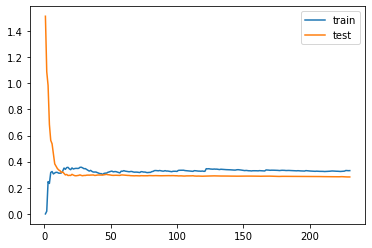

In [36]:
import plot_learning_curve 
import numpy as np

plot_learning_curve.plot_learning_error(clf,train_data,test_data,train_target,test_target);


## K近邻回归

In [25]:
from sklearn.model_selection import GridSearchCV

clf = KNeighborsRegressor() # 最近三个
param_dict = {"n_neighbors": range(3,20)}

clf=GridSearchCV(clf,param_grid=param_dict,scoring="neg_mean_squared_error")
clf.fit(test_data,test_target)

print("最佳参数：\n", clf.best_params_)

print("最佳结果：\n", clf.best_score_)

最佳参数：
 {'n_neighbors': 10}
最佳结果：
 -0.006164773583508245


In [16]:
plot_learning_curve.plot_learning_curve(KNeighborsRegressor(n_neighbors=7),'KNeighborsRegressor',train_data,train_target)

AttributeError: module 'plot_learning_curve' has no attribute 'plot_learning_curve'

## 决策树回归

In [ ]:
clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.5939820692041522


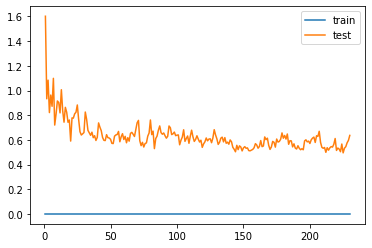

In [ ]:
plot_learning_curve.plot_learning_curve(clf,train_data,test_data,train_target,test_target)

## 随机森林

In [ ]:
clf = RandomForestRegressor() # 最近三个
param_dict = {"n_estimators": [10,50,100,200,500]}

clf=GridSearchCV(clf,param_grid=param_dict,scoring="neg_mean_squared_error")
clf.fit(test_data,test_target)

print("最佳参数：\n", clf.best_params_)

print("最佳结果：\n", clf.best_score_)

最佳参数：
 {'n_estimators': 50}
最佳结果：
 -0.2956325994270165


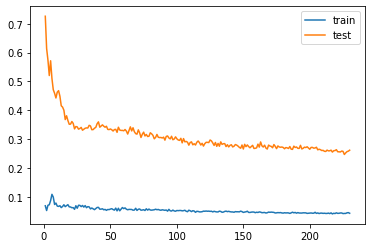

In [ ]:
plot_learning_curve.plot_learning_curve(RandomForestRegressor(n_estimators=50),train_data,test_data,train_target,test_target)

## LGB模型

In [ ]:
# lgb回归模型
clf = lgb.LGBMRegressor(
        learning_rate=0.01,
        boosting_type='gbdt',
        objective='regression',
    )

param_dict = {"n_estimators": [10,50,100,200,500,1000,2000,5000]}

clf=GridSearchCV(clf,param_grid=param_dict,scoring="neg_mean_squared_error")
clf.fit(test_data,test_target)

print("最佳参数：\n", clf.best_params_)

print("最佳结果：\n", clf.best_score_)

最佳参数：
 {'n_estimators': 500}
最佳结果：
 -0.2906213140535307


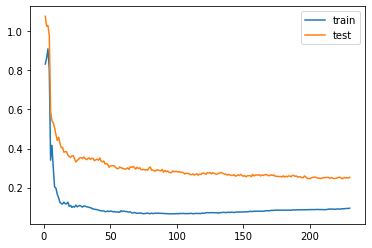

In [ ]:
plot_learning_curve.plot_learning_curve(lgb.LGBMRegressor(learning_rate=0.01,boosting_type='gbdt',objective='regression',n_estimators=500),
                                        train_data,test_data,train_target,test_target)